In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
img_width = 224
img_height = 224
batch_size = 32
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
train_generator = train_datagen.flow_from_directory(
    'D:/eye_multi_disease/NewDatasetEye/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training' 
)

validation_generator = train_datagen.flow_from_directory(
    'D:/eye_multi_disease/NewDatasetEye/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1309 images belonging to 12 classes.
Found 428 images belonging to 12 classes.


In [4]:
train_generator.class_indices

{'Age-Related Macular Degeneration': 0,
 'Branch Retinal Vein Occlusion': 1,
 'Cataract': 2,
 'Diabetic Retinopathy': 3,
 'Drusen': 4,
 'Glaucoma': 5,
 'Hypertension': 6,
 'Media Haze': 7,
 'Normal': 8,
 'Others': 9,
 'Pathological Myopia': 10,
 'Tessellation': 11}

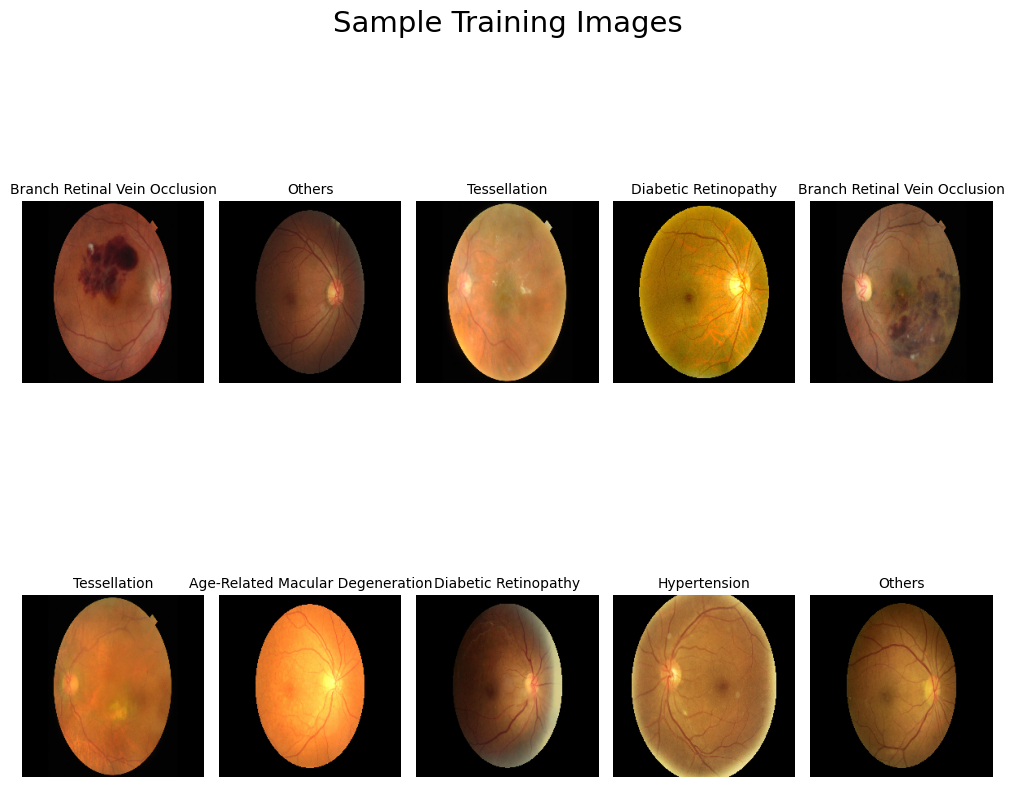

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 10))
idx = 0
labels = {value: key for key, value in train_generator.class_indices.items()}
for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}",color='black',fontsize=10)
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21,color='black')
plt.show()

#### CNN model

In [6]:
import keras
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

model=tf.keras.models.Sequential()
model.add(layers.Conv2D(16,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))


# Compile the model
tf.random.set_seed(1)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,213,484 (4.63 MB)

 Trainable params: 1,213,484 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
result = model.fit(train_generator,
                   validation_data=validation_generator,
                   epochs=100)

NameError: name 'model' is not defined

In [8]:
evaluation= model.evaluate(train_generator,verbose=0)
print("\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>EVALUATION OF MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
print("                                 Accuracy : {:.2f}".format(evaluation[1]))
print("                             Validation loss: {:.2f}".format(evaluation[0]))



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>EVALUATION OF MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
                                 Accuracy : 0.97
                             Validation loss: 0.11


In [9]:
model.save("D:/eye_multi_disease/eye_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━

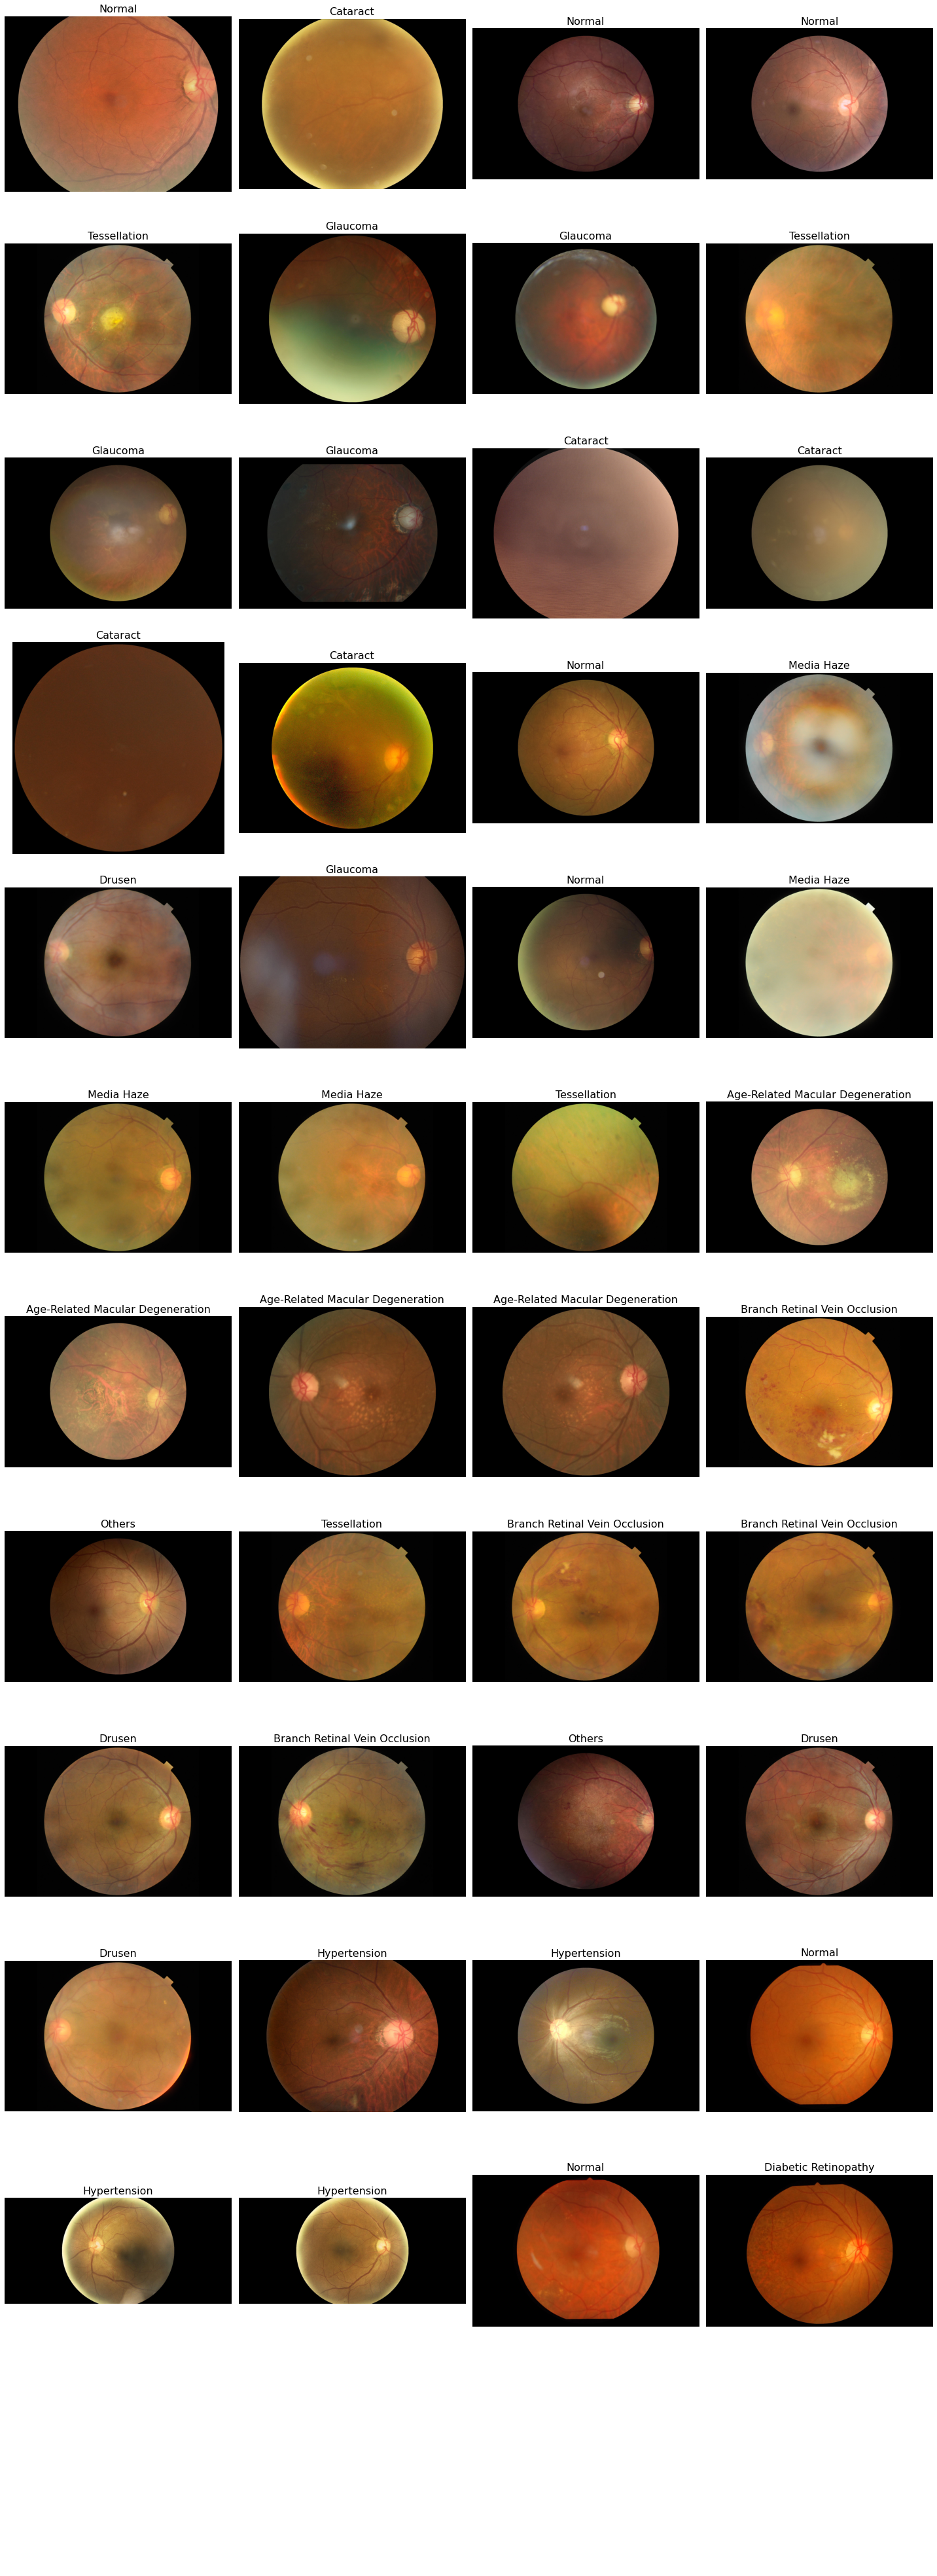

In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from PIL import Image

# Define parameters
img_height, img_width = 224, 224
batch_size = 32

# Directory containing the mixed test images
test_dir = 'D:/eye_multi_disease/predict/'

# Load the model
model = tf.keras.models.load_model('D:/eye_multi_disease/eye_model.keras')

# Assuming you have a train_generator to get class labels
# This assumes that train_generator is already defined somewhere in your code.
# You can adjust this to match how you are getting the class labels.
class_labels = list(train_generator.class_indices.keys())  # Adjust if needed

# List to store the image paths and their corresponding predictions
image_paths = []
predictions = []

# Iterate through the images in the test directory
for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    image_paths.append(img_path)
    
    # Load and preprocess the image
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict the class of the image
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    predictions.append(predicted_class[0])

# Display predictions
num_images = len(image_paths)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_images//4 + 1, ncols=4, figsize=(20, num_images // 4 * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the image paths and predictions
for idx, (img_path, pred) in enumerate(zip(image_paths, predictions)):
    # Open image
    img = Image.open(img_path)
    
    # Display image
    axes[idx].imshow(img)
    axes[idx].set_title(class_labels[pred], fontsize=16, color='black')
    axes[idx].axis('off')  # Hide the axes

# Remove any unused subplots
for idx in range(len(image_paths), len(axes)):
    axes[idx].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
! pip install streamlit